In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [3]:
#create an empty DataFrame
df = pd.DataFrame(columns=['path','label'])

#loop over fire images and label them 1
for dirname, _, filenames in os.walk('./fire_dataset/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

#loop over non fire images and label them 0
for dirname, _, filenames in os.walk('./fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12108\1095203632.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12108\1095203632.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12108\1095203632.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12108\1095203632.py:8: FutureWarning: The frame.appe

path     label
0          ./fire_dataset/fire_images\fire.571.png      fire
1  ./fire_dataset/non_fire_images\non_fire.221.png  non_fire
2          ./fire_dataset/fire_images\fire.469.png      fire
3          ./fire_dataset/fire_images\fire.435.png      fire
4          ./fire_dataset/fire_images\fire.186.png      fire
5          ./fire_dataset/fire_images\fire.560.png      fire
6  ./fire_dataset/non_fire_images\non_fire.136.png  non_fire
7          ./fire_dataset/fire_images\fire.185.png      fire
8   ./fire_dataset/non_fire_images\non_fire.99.png  non_fire
9           ./fire_dataset/fire_images\fire.70.png      fire

In [4]:
fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

In [5]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

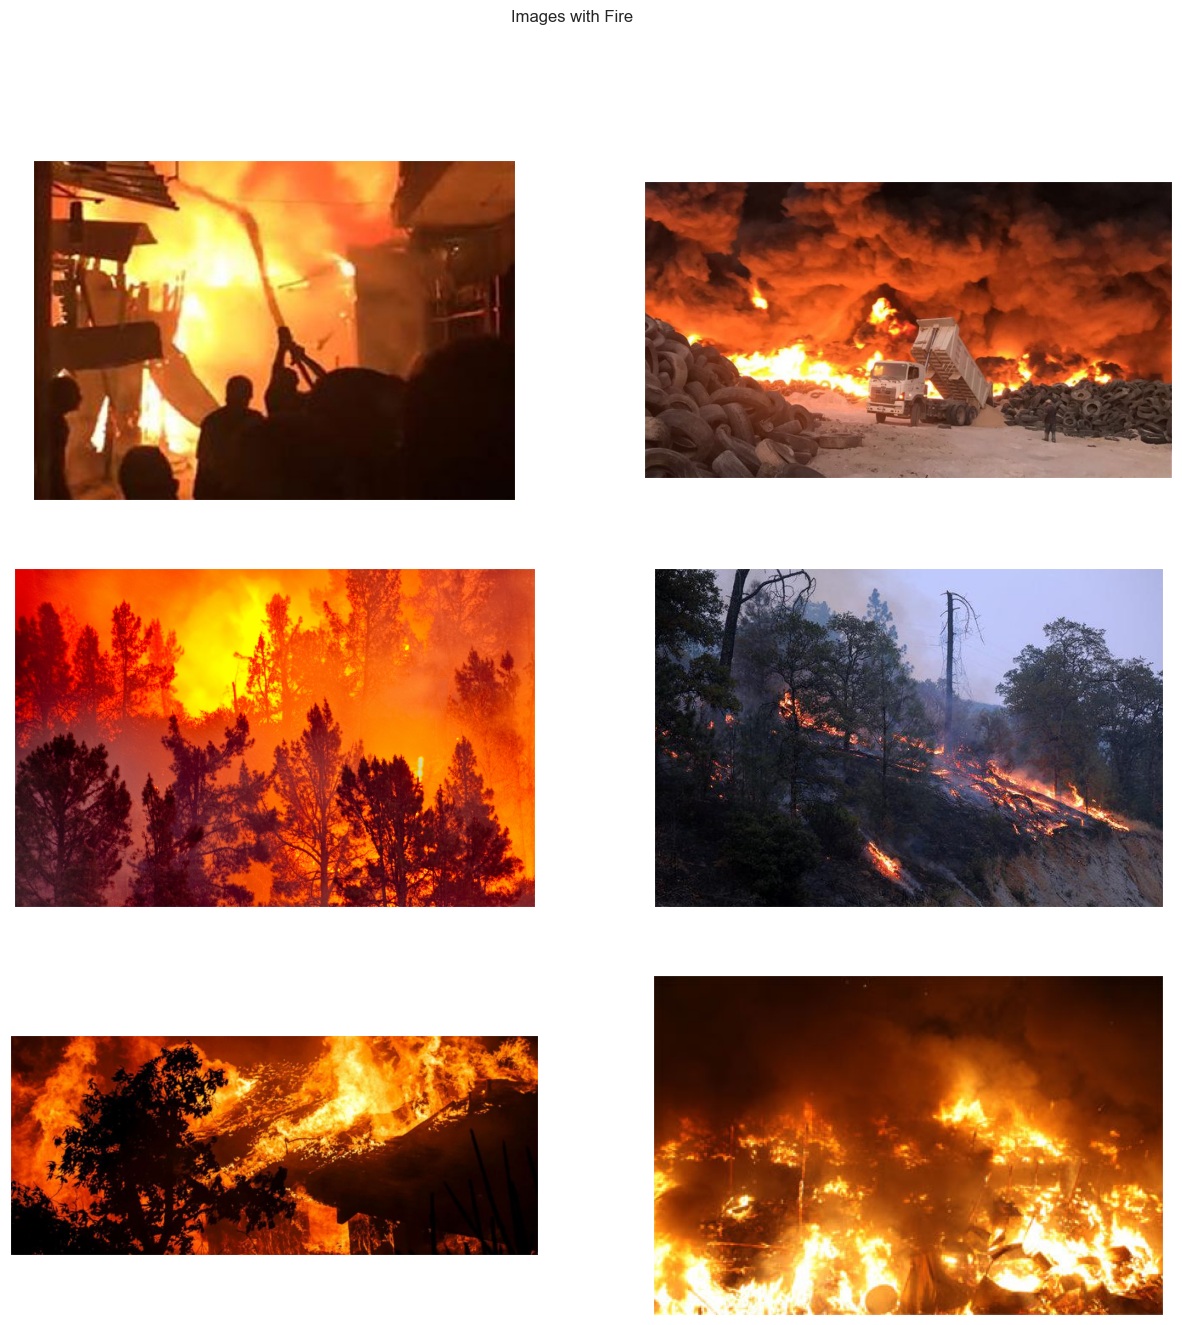

In [6]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

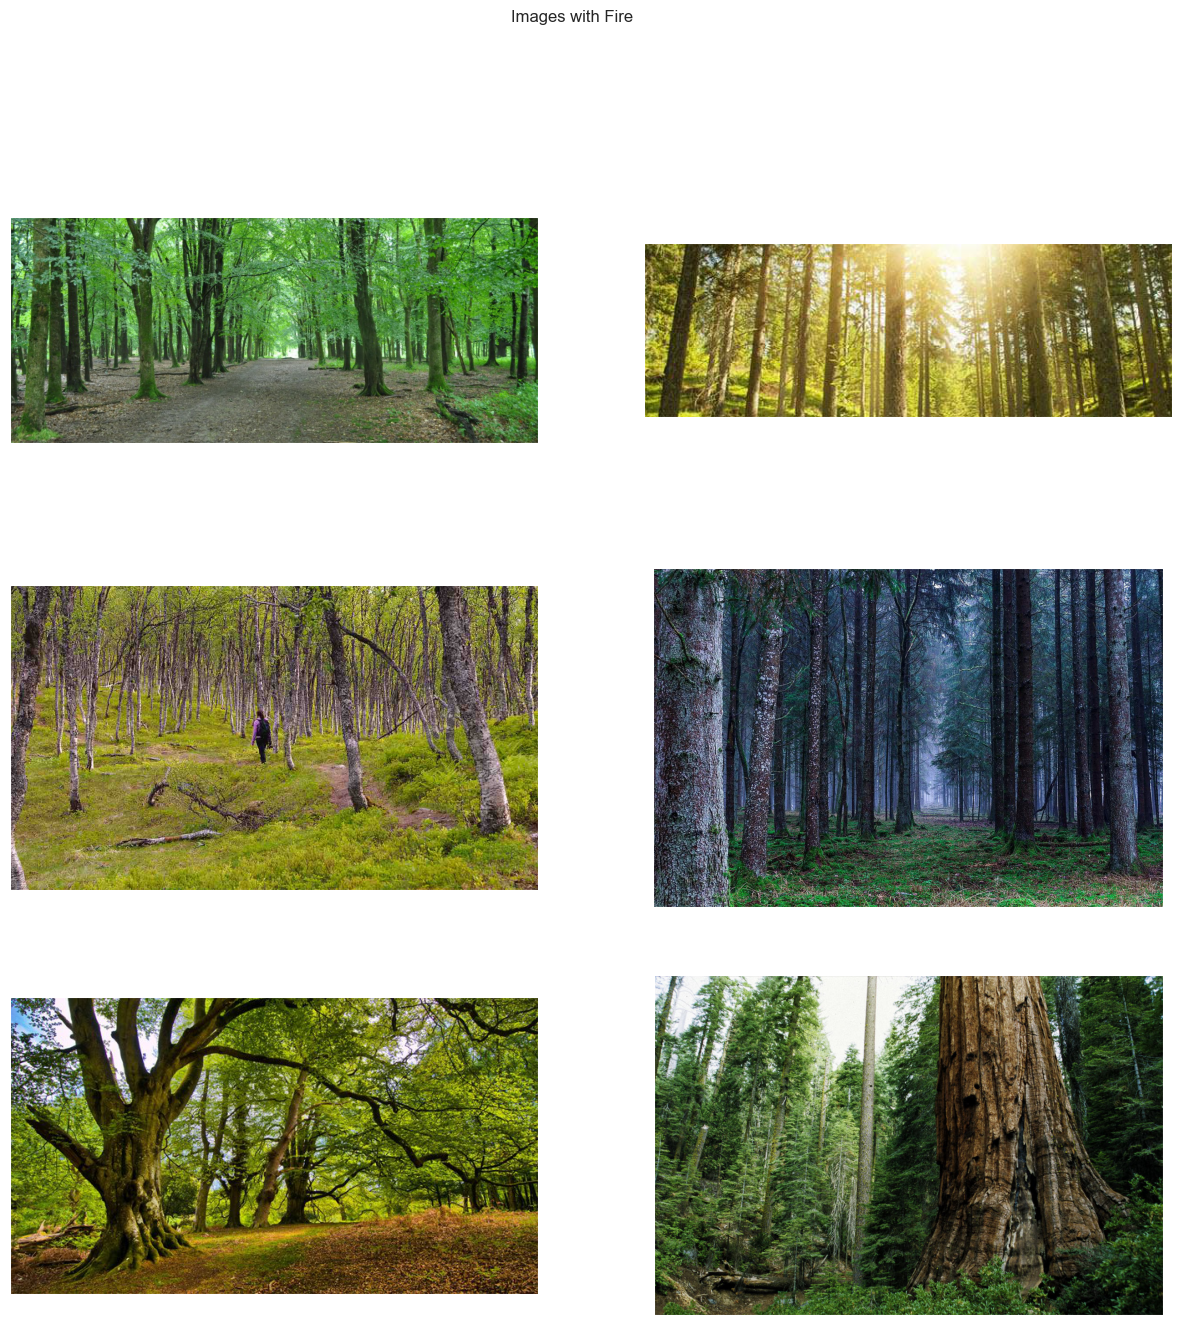

In [7]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [8]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

path     label  height  width
0          ./fire_dataset/fire_images\fire.571.png      fire     885   1180
1  ./fire_dataset/non_fire_images\non_fire.221.png  non_fire     630   1200
2          ./fire_dataset/fire_images\fire.469.png      fire    3712   5568
3          ./fire_dataset/fire_images\fire.435.png      fire     619   1100
4          ./fire_dataset/fire_images\fire.186.png      fire     420    650

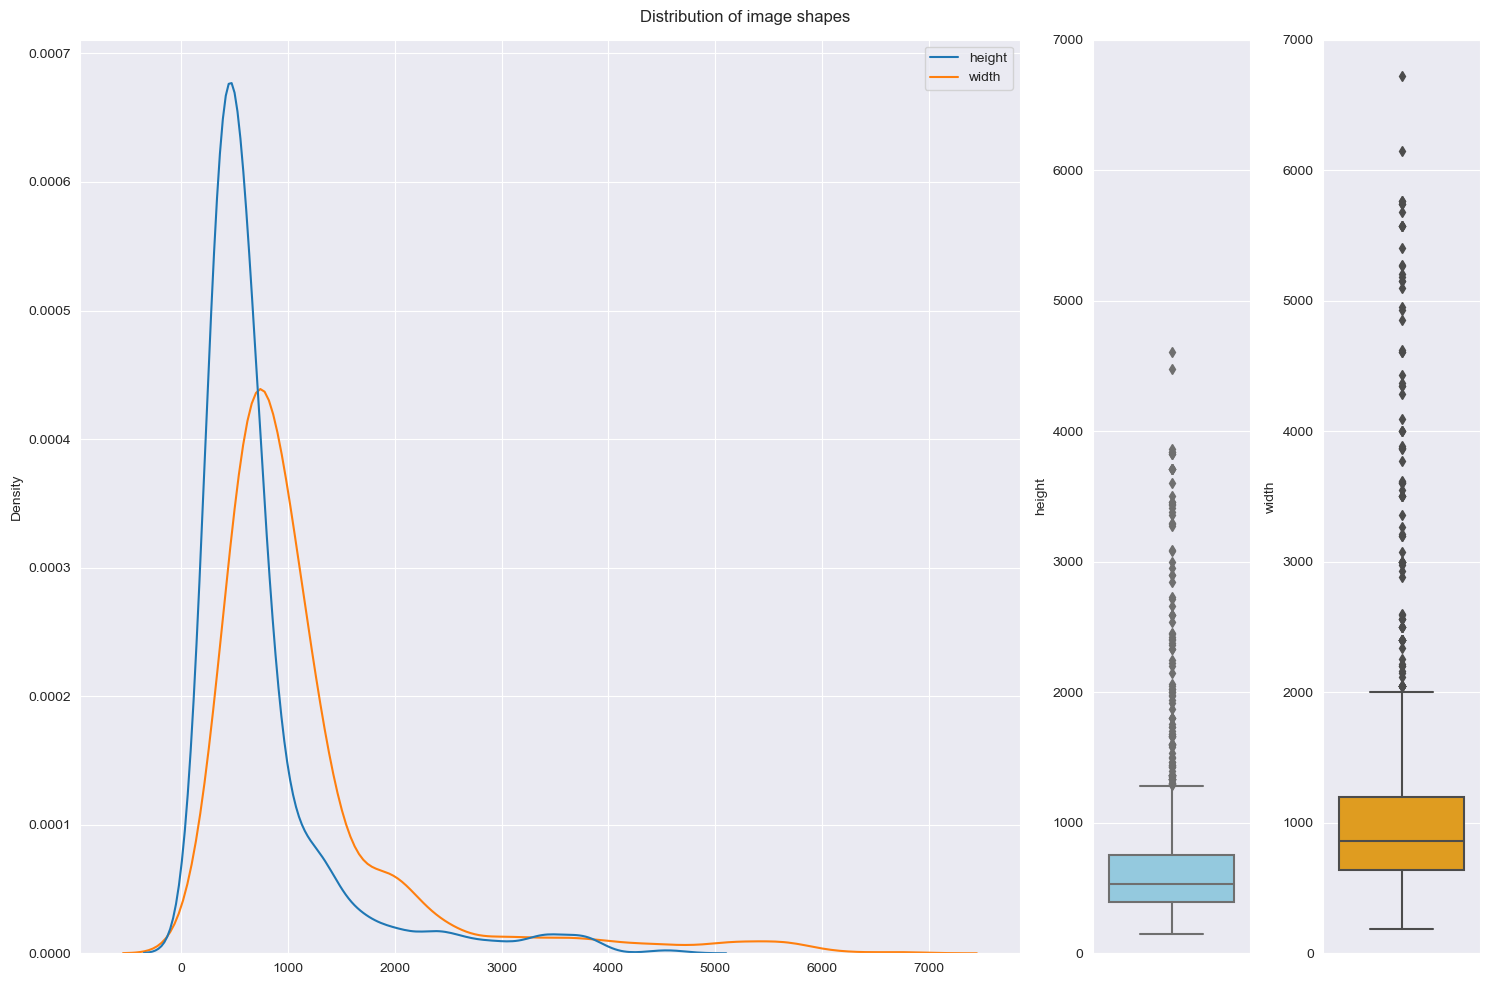

In [9]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [12]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 800 validated image filenames belonging to 2 classes.
Found 199 validated image filenames belonging to 2 classes.


In [13]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


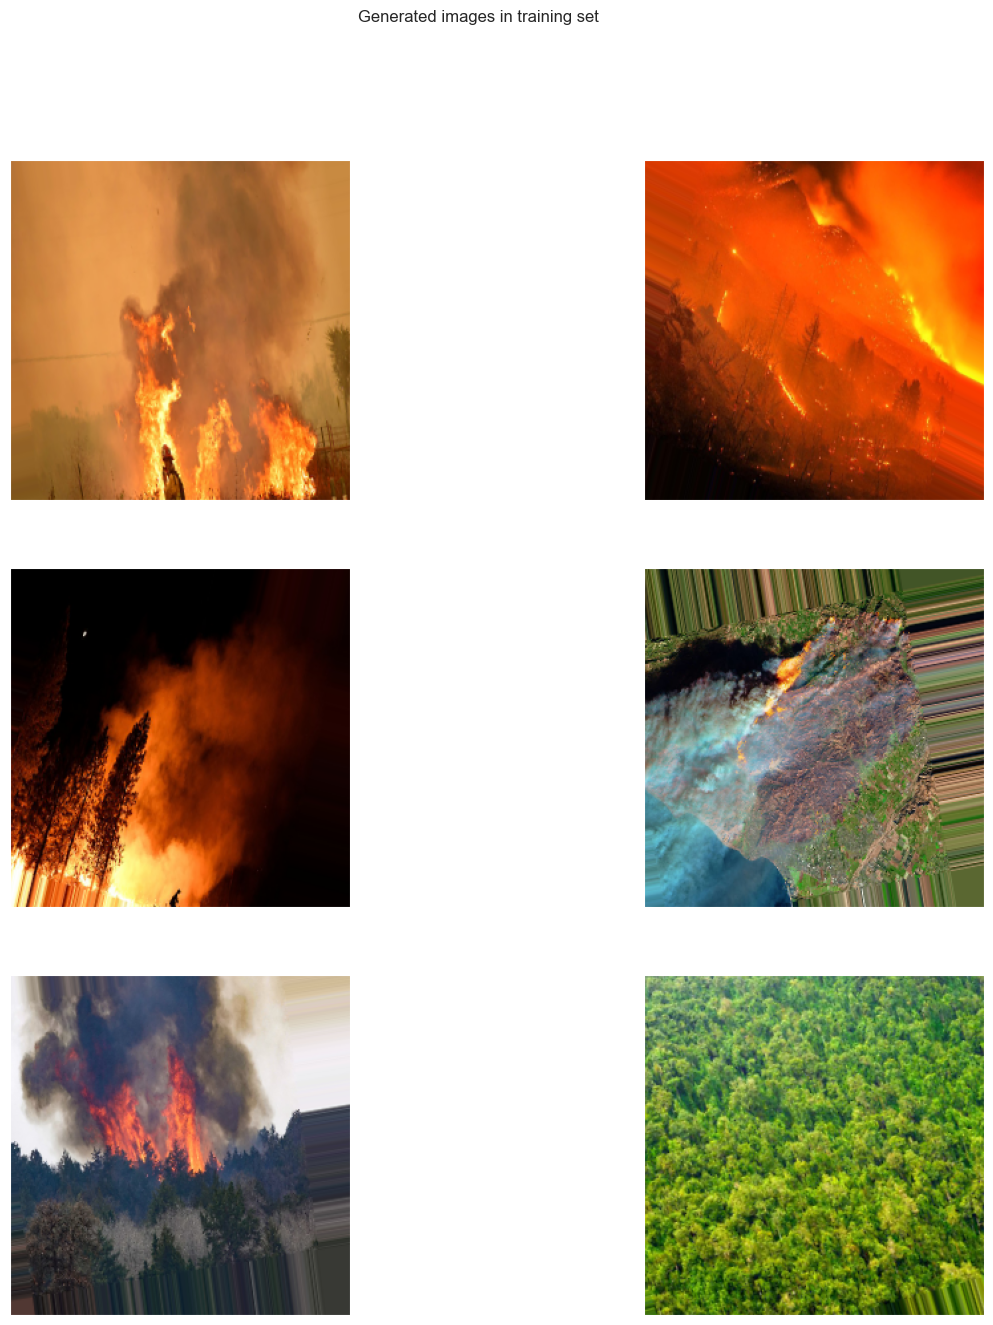

In [23]:
sns.set_style('dark')
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [27]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 255, 255, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,916,257 (30.20 MB)

 Trainable params: 7,916,257 (30.20 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [32]:
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

In [33]:
model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/15


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7040 - auc: 0.6733 - loss: 0.7104 - recall: 0.4413 - val_accuracy: 0.9447 - val_auc: 0.9916 - val_loss: 0.1817 - val_recall: 0.9804 - learning_rate: 0.0010
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9473 - auc: 0.9808 - loss: 0.1651 - recall: 0.8619 - val_accuracy: 0.9296 - val_auc: 0.9976 - val_loss: 0.1308 - val_recall: 0.7451 - learning_rate: 0.0010
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9506 - auc: 0.9890 - loss: 0.1291 - recall: 0.8470 - val_accuracy: 0.9849 - val_auc: 0.9967 - val_loss: 0.0806 - val_recall: 0.9608 - learning_rate: 0.0010
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9738 - auc: 0.9916 - loss: 0.0978 - recall: 0.9367 - val_accuracy: 0.9849 - val_auc: 0.9964 - val_loss: 0.0709 - val_recall: 0.9608 - learning_rate: 0.0010
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9532 - auc: 0.9885 - loss: 0.1208 - recall: 0.9011 - val_accuracy: 

In [34]:
history= model.history.history
px.line(history,title = "Metrics Plot")

In [35]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9733 - auc: 0.9991 - loss: 0.0555 - recall: 0.9177
accuracy: 0.97
auc: 1.00
loss: 0.06
recall: 0.92


In [36]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [37]:
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [38]:
model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

In [39]:
history2 = model2.fit(x = train_gen,batch_size=32,epochs=15,callbacks = [early_stoppping,reduce_lr_on_plateau],validation_data = val_gen)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8046 - auc_1: 0.8046 - loss: 1.6139 - recall_1: 0.6747 - val_accuracy: 0.9347 - val_auc_1: 0.9685 - val_loss: 0.2627 - val_recall_1: 0.9216 - learning_rate: 0.0010
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9595 - auc_1: 0.9653 - loss: 0.2522 - recall_1: 0.9024 - val_accuracy: 0.9548 - val_auc_1: 0.9390 - val_loss: 0.3496 - val_recall_1: 0.8431 - learning_rate: 0.0010
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.9618 - auc_1: 0.9793 - loss: 0.2131 - recall_1: 0.8873 - val_accuracy: 0.9749 - val_auc_1: 0.9907 - val_loss: 0.1047 - val_recall_1: 0.9608 - learning_rate: 0.0010
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.9767 - auc_1: 0.9922 - loss: 0.0841 - recall_1: 0.9548 - val_accuracy: 0.9799 - val_auc_1: 0.9987 - val_loss: 0.0446 - val_recall_1: 0.9608 - learning_rate: 0.0010
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.9797 - auc_1: 0.992

In [40]:
px.line(history,title='Metrics Plot')

In [41]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9665 - auc: 0.9958 - loss: 0.0812 - recall: 0.8962
accuracy: 0.98
auc: 1.00
loss: 0.07
recall: 0.94


In [42]:
#Downloading the image
!curl https://static01.nyt.com/images/2021/02/19/world/19storm-briefing-texas-fire/19storm-briefing-texas-fire-articleLarge.jpg --output predict.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 50241  100 50241    0     0  62171      0 --:--:-- --:--:-- --:--:-- 62179


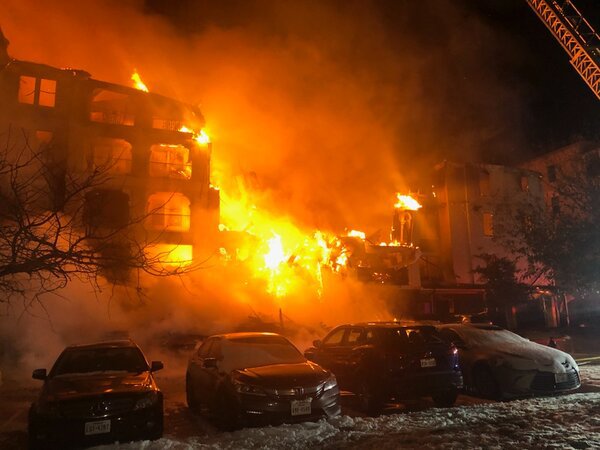

In [44]:
#loading the image
img = image.load_img('predict.jpg')
img

In [45]:
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


In [46]:
prediction = int(tf.round(model2.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted value is:  0 and the predicted label is: fire
